# Loading and viewing your data
In this chapter, you're going to look at a subset of the Department of Buildings Job Application Filings dataset from the NYC Open Data portal. This dataset consists of job applications filed on January 22, 2017.

Your first task is to load this dataset into a DataFrame and then inspect it using the .head() and .tail() methods. However, you'll find out very quickly that the printed results don't allow you to see everything you need, since there are too many columns. Therefore, you need to look at the data in another way.

The .shape and .columns attributes let you see the shape of the DataFrame and obtain a list of its columns. From here, you can see which columns are relevant to the questions you'd like to ask of the data. To this end, a new DataFrame, df_subset, consisting only of these relevant columns, has been pre-loaded. This is the DataFrame you'll work with in the rest of the chapter.

Get acquainted with the dataset now by exploring it with pandas! This initial exploratory analysis is a crucial first step of data cleaning.

In [1]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv')

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

# Print the head and tail of df_subset
print(df_subset.head())
print(df_subset.tail())


FileNotFoundError: [Errno 2] File b'dob_job_application_filings_subset.csv' does not exist: b'dob_job_application_filings_subset.csv'

# Further diagnosis
In the previous exercise, you identified some potentially unclean or missing data. Now, you'll continue to diagnose your data with the very useful .info() method.

The .info() method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column. This is the kind of information that will allow you to confirm whether the 'Initial Cost' and 'Total Est. Fee' columns are numeric or strings. From the results, you'll also be able to see whether or not all columns have complete data in them.

The full DataFrame df and the subset DataFrame df_subset have been pre-loaded. Your task is to use the .info() method on these and analyze the results.

In [2]:
# Print the info of df
print(df.info())

# Print the info of df_subset
print(df_subset.info())


NameError: name 'df' is not defined

# Frequency counts for categorical data
As you've seen, .describe() can only be used on numeric columns. So how can you diagnose data issues when you have categorical data? One way is by using the .value_counts() method, which returns the frequency counts for each unique value in a column!

This method also has an optional parameter called dropna which is True by default. What this means is if you have missing data in a column, it will not give a frequency count of them. You want to set the dropna column to False so if there are missing values in a column, it will give you the frequency counts.

In this exercise, you're going to look at the 'Borough', 'State', and 'Site Fill' columns to make sure all the values in there are valid. When looking at the output, do a sanity check: Are all values in the 'State' column from NY, for example? Since the dataset consists of applications filed in NY, you would expect this to be the case.

In [3]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))


NameError: name 'df' is not defined

# Visualizing single variables with histograms
Up until now, you've been looking at descriptive statistics of your data. One of the best ways to confirm what the numbers are telling you is to plot and visualize the data.

You'll start by visualizing single variables using a histogram for numeric values. The column you will work on in this exercise is 'Existing Zoning Sqft'.

The .plot() method allows you to create a plot of each column of a DataFrame. The kind parameter allows you to specify the type of plot to use - kind='hist', for example, plots a histogram.

In the IPython Shell, begin by computing summary statistics for the 'Existing Zoning Sqft' column using the .describe() method. You'll notice that there are extremely large differences between the min and max values, and the plot will need to be adjusted accordingly. In such cases, it's good to look at the plot on a log scale. The keyword arguments logx=True or logy=True can be passed in to .plot() depending on which axis you want to rescale.

Finally, note that Python will render a plot such that the axis will hold all the information. That is, if you end up with large amounts of whitespace in your plot, it indicates counts or values too small to render.

In [4]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Describe the column
df['Existing Zoning Sqft'].describe()

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()


NameError: name 'df' is not defined

# Visualizing multiple variables with boxplots
Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical.

In this exercise, your job is to use a boxplot to compare the 'initial_cost' across the different values of the 'Borough' column. The pandas .boxplot() method is a quick way to do this, in which you have to specify the column and by parameters. Here, you want to visualize how 'initial_cost' varies by 'Borough'.

pandas and matplotlib.pyplot have been imported for you as pd and plt, respectively, and the DataFrame has been pre-loaded as df.

In [5]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
plt.show()


NameError: name 'df' is not defined

# Visualizing multiple variables with scatter plots
Boxplots are great when you have a numeric column that you want to compare across different categories. When you want to visualize two numeric columns, scatter plots are ideal.

In this exercise, your job is to make a scatter plot with 'initial_cost' on the x-axis and the 'total_est_fee' on the y-axis. You can do this by using the DataFrame .plot() method with kind='scatter'. You'll notice right away that there are 2 major outliers shown in the plots.

Since these outliers dominate the plot, an additional DataFrame, df_subset, has been provided, in which some of the extreme values have been removed. After making a scatter plot using this, you'll find some interesting patterns here that would not have been seen by looking at summary statistics or 1 variable plots.

When you're done, you can cycle between the two plots by clicking the 'Previous Plot' and 'Next Plot' buttons below the plot.

In [6]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

# Create and display the second scatter plot
df_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()


NameError: name 'df' is not defined

# Reshaping your data using melt
Melting data is the process of turning columns of your data into rows of data. Consider the DataFrames from the previous exercise. In the tidy DataFrame, the variables Ozone, Solar.R, Wind, and Temp each had their own column. If, however, you wanted these variables to be in rows instead, you could melt the DataFrame. In doing so, however, you would make the data untidy! This is important to keep in mind: Depending on how your data is represented, you will have to reshape it differently (e.g., this could make it easier to plot values).

In this exercise, you will practice melting a DataFrame using pd.melt(). There are two parameters you should be aware of: id_vars and value_vars. The id_vars represent the columns of the data you do not want to melt (i.e., keep it in its current shape), while the value_vars represent the columns you do wish to melt into rows. By default, if no value_vars are provided, all columns not set in the id_vars will be melted. This could save a bit of typing, depending on the number of columns that need to be melted.

The (tidy) DataFrame airquality has been pre-loaded. Your job is to melt its Ozone, Solar.R, Wind, and Temp columns into rows. Later in this chapter, you'll learn how to bring this melted DataFrame back into a tidy form.

In [8]:
# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars='Date')

# Print the head of airquality_melt
print(airquality_melt.head())


NameError: name 'airquality' is not defined

# Customizing melted data
When melting DataFrames, it would be better to have column names more meaningful than variable and value (the default names used by pd.melt()).

The default names may work in certain situations, but it's best to always have data that is self explanatory.

You can rename the variable column by specifying an argument to the var_name parameter, and the value column by specifying an argument to the value_name parameter. You will now practice doing exactly this. Pandas as pd and the DataFrame airquality has been pre-loaded for you.

In [9]:
# Print the head of airquality
print(airquality.head())

# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars='Date', var_name='measurement', value_name='reading')

# Print the head of airquality_melt
print(airquality_melt.head())


NameError: name 'airquality' is not defined

# Pivot data
Pivoting data is the opposite of melting it. Remember the tidy form that the airquality DataFrame was in before you melted it? You'll now begin pivoting it back into that form using the .pivot_table() method!

While melting takes a set of columns and turns it into a single column, pivoting will create a new column for each unique value in a specified column.

.pivot_table() has an index parameter which you can use to specify the columns that you don't want pivoted: It is similar to the id_vars parameter of pd.melt(). Two other parameters that you have to specify are columns (the name of the column you want to pivot), and values (the values to be used when the column is pivoted). The melted DataFrame airquality_melt has been pre-loaded for you.

In [10]:
# Print the head of airquality_melt
print(airquality_melt.head())

# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index='Date', columns='measurement', values='reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())


NameError: name 'airquality_melt' is not defined

# Resetting the index of a DataFrame
After pivoting airquality_melt in the previous exercise, you didn't quite get back the original DataFrame.

What you got back instead was a pandas DataFrame with a hierarchical index (also known as a MultiIndex).

Hierarchical indexes are covered in depth in Manipulating DataFrames with pandas. In essence, they allow you to group columns or rows by another variable - in this case, by 'Date'.

There's a very simple method you can use to get back the original DataFrame from the pivoted DataFrame: .reset_index(). Dan didn't show you how to use this method in the video, but you're now going to practice using it in this exercise to get back the original DataFrame from airquality_pivot, which has been pre-loaded.

In [11]:
# Print the index of airquality_pivot
print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot_reset
airquality_pivot_reset = airquality_pivot.reset_index()

# Print the new index of airquality_pivot_reset
print(airquality_pivot_reset.index)

# Print the head of airquality_pivot_reset
print(airquality_pivot_reset.head())


NameError: name 'airquality_pivot' is not defined

# Pivoting duplicate values
So far, you've used the .pivot_table() method when there are multiple index values you want to hold constant during a pivot. In the video, Dan showed you how you can also use pivot tables to deal with duplicate values by providing an aggregation function through the aggfunc parameter. Here, you're going to combine both these uses of pivot tables.

Let's say your data collection method accidentally duplicated your dataset. Such a dataset, in which each row is duplicated, has been pre-loaded as airquality_dup. In addition, the airquality_melt DataFrame from the previous exercise has been pre-loaded. Explore their shapes in the IPython Shell by accessing their .shape attributes to confirm the duplicate rows present in airquality_dup.

You'll see that by using .pivot_table() and the aggfunc parameter, you can not only reshape your data, but also remove duplicates. Finally, you can then flatten the columns of the pivoted DataFrame using .reset_index().

NumPy and pandas have been imported as np and pd respectively.

In [12]:
# Pivot table the airquality_dup: airquality_pivot
airquality_pivot = airquality_dup.pivot_table(index='Date', columns='measurement', values='reading', aggfunc=np.mean)

# Print the head of airquality_pivot before reset_index
print(airquality_pivot.head())

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

# Print the head of airquality_pivot
print(airquality_pivot.head())

# Print the head of airquality
print(airquality.head())


NameError: name 'airquality_dup' is not defined

# Splitting a column with .str
The dataset you saw in the video, consisting of case counts of tuberculosis by country, year, gender, and age group, has been pre-loaded into a DataFrame as tb.

In this exercise, you're going to tidy the 'm014' column, which represents males aged 0-14 years of age. In order to parse this value, you need to extract the first letter into a new column for gender, and the rest into a column for age_group. Here, since you can parse values by position, you can take advantage of pandas' vectorized string slicing by using the str attribute of columns of type object.

Begin by printing the columns of tb in the IPython Shell using its .columns attribute, and take note of the problematic column.

In [13]:
# Melt tb: tb_melt
tb_melt = pd.melt(tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())


NameError: name 'tb' is not defined

# Splitting a column with .split() and .get()
Another common way multiple variables are stored in columns is with a delimiter. You'll learn how to deal with such cases in this exercise, using a dataset consisting of Ebola cases and death counts by state and country. It has been pre-loaded into a DataFrame as ebola.

Print the columns of ebola in the IPython Shell using ebola.columns. Notice that the data has column names such as Cases_Guinea and Deaths_Guinea. Here, the underscore _ serves as a delimiter between the first part (cases or deaths), and the second part (country).

This time, you cannot directly slice the variable by position as in the previous exercise. You now need to use Python's built-in string method called .split(). By default, this method will split a string into parts separated by a space. However, in this case you want it to split by an underscore. You can do this on 'Cases_Guinea', for example, using 'Cases_Guinea'.split('_'), which returns the list ['Cases', 'Guinea'].

The next challenge is to extract the first element of this list and assign it to a type variable, and the second element of the list to a country variable. You can accomplish this by accessing the str attribute of the column and using the .get() method to retrieve the 0 or 1 index, depending on the part you want.

In [14]:
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
print(ebola_melt.head())


NameError: name 'ebola' is not defined

# Combining rows of data
The dataset you'll be working with here relates to NYC Uber data. The original dataset has all the originating Uber pickup locations by time and latitude and longitude. For didactic purposes, you'll be working with a very small portion of the actual data.

Three DataFrames have been pre-loaded: uber1, which contains data for April 2014, uber2, which contains data for May 2014, and uber3, which contains data for June 2014. Your job in this exercise is to concatenate these DataFrames together such that the resulting DataFrame has the data for all three months.

Begin by exploring the structure of these three DataFrames in the IPython Shell using methods such as .head().

In [15]:
# Concatenate uber1, uber2, and uber3: row_concat
row_concat = pd.concat([uber1, uber2, uber3])

# Print the shape of row_concat
print(row_concat.shape)

# Print the head of row_concat
print(row_concat.head())


NameError: name 'uber1' is not defined

# Combining columns of data
Think of column-wise concatenation of data as stitching data together from the sides instead of the top and bottom. To perform this action, you use the same pd.concat() function, but this time with the keyword argument axis=1. The default, axis=0, is for a row-wise concatenation.

You'll return to the Ebola dataset you worked with briefly in the last chapter. It has been pre-loaded into a DataFrame called ebola_melt. In this DataFrame, the status and country of a patient is contained in a single column. This column has been parsed into a new DataFrame, status_country, where there are separate columns for status and country.

Explore the ebola_melt and status_country DataFrames in the IPython Shell. Your job is to concatenate them column-wise in order to obtain a final, clean DataFrame.

In [16]:
# Concatenate ebola_melt and status_country column-wise: ebola_tidy
ebola_tidy = pd.concat([ebola_melt, status_country], axis = 1)

# Print the shape of ebola_tidy
print(ebola_tidy.shape)

# Print the head of ebola_tidy
print(ebola_tidy.head())


NameError: name 'ebola_melt' is not defined

# Finding files that match a pattern
You're now going to practice using the glob module to find all csv files in the workspace. In the next exercise, you'll programmatically load them into DataFrames.

As Dan showed you in the video, the glob module has a function called glob that takes a pattern and returns a list of the files in the working directory that match that pattern.

For example, if you know the pattern is part_ single digit number .csv, you can write the pattern as 'part_?.csv' (which would match part_1.csv, part_2.csv, part_3.csv, etc.)

Similarly, you can find all .csv files with '*.csv', or all parts with 'part_*'. The ? wildcard represents any 1 character, and the * wildcard represents any number of characters.

In [17]:
# Import necessary modules
import glob
import pandas as pd

# Write the pattern: pattern
pattern = '*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)

# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
print(csv2.head())


['winequality-red.csv', 'socr.csv']
              Name Team       Position  Height(inches)  Weight(pounds)  \
0    Adam_Donachie  BAL        Catcher              74           180.0   
1        Paul_Bako  BAL        Catcher              74           215.0   
2  Ramon_Hernandez  BAL        Catcher              72           210.0   
3     Kevin_Millar  BAL  First_Baseman              72           210.0   
4      Chris_Gomez  BAL  First_Baseman              73           188.0   

        Age  
0     23.39  
1  35.09.00  
2  31.18.00  
3  35.43.00  
4  36.11.00  


# Iterating and concatenating all matches
Now that you have a list of filenames to load, you can load all the files into a list of DataFrames that can then be concatenated.

You'll start with an empty list called frames. Your job is to use a for loop to:

iterate through each of the filenames
read each filename into a DataFrame, and then
append it to the frames list.
You can then concatenate this list of DataFrames using pd.concat(). Go for it!

In [18]:
# Create an empty list: frames
frames = []

#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    
    # Append df to frames
    frames.append(df)

# Concatenate frames into a single DataFrame: uber
uber = pd.concat(frames)

# Print the shape of uber
print(uber.shape)

# Print the head of uber
print(uber.head())


(2633, 7)
   Age  Height(inches) Name Position Team  Weight(pounds)  \
0  NaN             NaN  NaN      NaN  NaN             NaN   
1  NaN             NaN  NaN      NaN  NaN             NaN   
2  NaN             NaN  NaN      NaN  NaN             NaN   
3  NaN             NaN  NaN      NaN  NaN             NaN   
4  NaN             NaN  NaN      NaN  NaN             NaN   

  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                       
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                       
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                       

/Users/manfredimiraula/.virtualenvs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


# 1-to-1 data merge
Merging data allows you to combine disparate datasets into a single dataset to do more complex analysis.

Here, you'll be using survey data that contains readings that William Dyer, Frank Pabodie, and Valentina Roerich took in the late 1920s and 1930s while they were on an expedition towards Antarctica. The dataset was taken from a sqlite database from the Software Carpentry SQL lesson.

Two DataFrames have been pre-loaded: site and visited. Explore them in the IPython Shell and take note of their structure and column names. Your task is to perform a 1-to-1 merge of these two DataFrames using the 'name' column of site and the 'site' column of visited.

In [19]:
# Merge the DataFrames: o2o
o2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Print o2o
print(o2o)


NameError: name 'site' is not defined

# Many-to-1 data merge
In a many-to-one (or one-to-many) merge, one of the values will be duplicated and recycled in the output. That is, one of the keys in the merge is not unique.

Here, the two DataFrames site and visited have been pre-loaded once again. Note that this time, visited has multiple entries for the site column. Confirm this by exploring it in the IPython Shell.

The .merge() method call is the same as the 1-to-1 merge from the previous exercise, but the data and output will be different.

In [20]:
# Merge the DataFrames: m2o
m2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Print m2o
print(m2o)


NameError: name 'site' is not defined

# Many-to-many data merge
The final merging scenario occurs when both DataFrames do not have unique keys for a merge. What happens here is that for each duplicated key, every pairwise combination will be created.

Two example DataFrames that share common key values have been pre-loaded: df1 and df2. Another DataFrame df3, which is the result of df1 merged with df2, has been pre-loaded. All three DataFrames have been printed - look at the output and notice how pairwise combinations have been created. This example is to help you develop your intuition for many-to-many merges.

Here, you'll work with the site and visited DataFrames from before, and a new survey DataFrame. Your task is to merge site and visited as you did in the earlier exercises. You will then merge this merged DataFrame with survey.

The survey, visited, and site DataFrames are available.

In [22]:
# Merge survey, visited and site to a single data frame
# of surveys with visit and site details

# Merge survey and visited on visit IDs
survey_with_visits = pd.merge(survey, visited, left_on='taken', right_on='ident')
# or 
# survey_with_visits = survey.merge(visited, left_on='taken', right_on='ident')

# Merge previous result with site on site IDs: m2m
m2m = pd.merge(survey_with_visits, site, left_on='site', right_on='name')
# or 
# m2m = survey_with_visits.merge(site, left_on='site', right_on = 'name')

# Print m2m
print(m2m)

NameError: name 'survey' is not defined

# Converting data types
In this exercise, you'll see how ensuring all categorical variables in a DataFrame are of type category reduces memory usage.

The tips dataset has been loaded into a DataFrame called tips. This data contains information about how much a customer tipped, whether the customer was male or female, a smoker or not, etc.

Look at the output of tips.info() in the IPython Shell. You'll note that two columns that should be categorical - sex and smoker - are instead of type object, which is pandas' way of storing arbitrary strings. Your job is to convert these two columns to type category and note the reduced memory usage.

In [23]:
# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

# Print the info of tips
print(tips.info())


NameError: name 'tips' is not defined

# Working with numeric data
If you expect the data type of a column to be numeric (int or float), but instead it is of type object, this typically means that there is a non numeric value in the column, which also signifies bad data.

You can use the pd.to_numeric() function to convert a column into a numeric data type. If the function raises an error, you can be sure that there is a bad value within the column. You can either use the techniques you learned in Chapter 1 to do some exploratory data analysis and find the bad value, or you can choose to ignore or coerce the value into a missing value, NaN.

A modified version of the tips dataset has been pre-loaded into a DataFrame called tips. For instructional purposes, it has been pre-processed to introduce some 'bad' data for you to clean. Use the .info() method to explore this. You'll note that the total_bill and tip columns, which should be numeric, are instead of type object. Your job is to fix this.

In [24]:
# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors = 'coerce')

# Print the info of tips
print(tips.info())


NameError: name 'tips' is not defined

# String parsing with regular expressions
In the video, Dan introduced you to the basics of regular expressions, which are powerful ways of defining patterns to match strings. This exercise will get you started with writing them.

When working with data, it is sometimes necessary to write a regular expression to look for properly entered values. Phone numbers in a dataset is a common field that needs to be checked for validity. Your job in this exercise is to define a regular expression to match US phone numbers that fit the pattern of xxx-xxx-xxxx.

The regular expression module in python is re. When performing pattern matching on data, since the pattern will be used for a match across multiple rows, it's better to compile the pattern first using re.compile(), and then use the compiled pattern to match values.

In [25]:
# Import the regular expression module
import re

# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result2 = prog.match('1123-456-7890')
print(bool(result2))


True
False


# Extracting numerical values from strings
Extracting numbers from strings is a common task, particularly when working with unstructured data or log files.

Say you have the following string: 'the recipe calls for 6 strawberries and 2 bananas'.

It would be useful to extract the 6 and the 2 from this string to be saved for later use when comparing strawberry to banana ratios.

When using a regular expression to extract multiple numbers (or multiple pattern matches, to be exact), you can use the re.findall() function. Dan did not discuss this in the video, but it is straightforward to use: You pass in a pattern and a string to re.findall(), and it will return a list of the matches.

In [26]:
# Import the regular expression module
import re

# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)


['10', '1']


# Pattern matching
In this exercise, you'll continue practicing your regular expression skills. For each provided string, your job is to write the appropriate pattern to match it.

In [27]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

# Write the third pattern
pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)


True
True
True


# Custom functions to clean data
You'll now practice writing functions to clean data.

The tips dataset has been pre-loaded into a DataFrame called tips. It has a 'sex' column that contains the values 'Male' or 'Female'. Your job is to write a function that will recode 'Female' to 0, 'Male' to 1, and return np.nan for all entries of 'sex' that are neither 'Female' nor 'Male'.

Recoding variables like this is a common data cleaning task. Functions provide a mechanism for you to abstract away complex bits of code as well as reuse code. This makes your code more readable and less error prone.

As Dan showed you in the videos, you can use the .apply() method to apply a function across entire rows or columns of DataFrames. However, note that each column of a DataFrame is a pandas Series. Functions can also be applied across Series. Here, you will apply your function over the 'sex' column.

In [28]:
# Define recode_gender()
def recode_gender(gender):

    # Return 0 if gender is 'Female'
    if gender == 'Female':
        return 0
    
    # Return 1 if gender is 'Male'    
    elif gender == 'Male':
        return 1
    
    # Return np.nan    
    else:
        return np.nan

# Apply the function to the sex column
tips['recode'] = tips.sex.apply(recode_gender)

# Print the first five rows of tips
print(tips.head())


NameError: name 'tips' is not defined

# Lambda functions
You'll now be introduced to a powerful Python feature that will help you clean your data more effectively: lambda functions. Instead of using the def syntax that you used in the previous exercise, lambda functions let you make simple, one-line functions.

For example, here's a function that squares a variable used in an .apply() method:

def my_square(x):
    return x ** 2

df.apply(my_square)
The equivalent code using a lambda function is:

df.apply(lambda x: x ** 2)
The lambda function takes one parameter - the variable x. The function itself just squares x and returns the result, which is whatever the one line of code evaluates to. In this way, lambda functions can make your code concise and Pythonic.

The tips dataset has been pre-loaded into a DataFrame called tips. Your job is to clean its 'total_dollar' column by removing the dollar sign. You'll do this using two different methods: With the .replace() method, and with regular expressions. The regular expression module re has been pre-imported.

In [29]:
# Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_dollar.apply(lambda x: x.replace('$', ''))

# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])

# Print the head of tips
print(tips.head())


NameError: name 'tips' is not defined

# Dropping duplicate data
Duplicate data causes a variety of problems. From the point of view of performance, they use up unnecessary amounts of memory and cause unneeded calculations to be performed when processing data. In addition, they can also bias any analysis results.

A dataset consisting of the performance of songs on the Billboard charts has been pre-loaded into a DataFrame called billboard. Check out its columns in the IPython Shell. Your job in this exercise is to subset this DataFrame and then drop all duplicate rows.

In [30]:
# Create the new DataFrame: tracks
tracks = billboard[['year','artist','track','time']]

# Print info of tracks
print(tracks.info())

# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

# Print info of tracks
print(tracks_no_duplicates.info())


NameError: name 'billboard' is not defined

# Filling missing data
Here, you'll return to the airquality dataset from Chapter 2. It has been pre-loaded into the DataFrame airquality, and it has missing values for you to practice filling in. Explore airquality in the IPython Shell to checkout which columns have missing values.

It's rare to have a (real-world) dataset without any missing values, and it's important to deal with them because certain calculations cannot handle missing values while some calculations will, by default, skip over any missing values.

Also, understanding how much missing data you have, and thinking about where it comes from is crucial to making unbiased interpretations of data.

In [31]:
# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality['Ozone'].mean()

# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality['Ozone'].fillna(oz_mean)

# Print the info of airquality
print(airquality.info())


NameError: name 'airquality' is not defined

# Testing your data with asserts
Here, you'll practice writing assert statements using the Ebola dataset from previous chapters to programmatically check for missing values and to confirm that all values are positive. The dataset has been pre-loaded into a DataFrame called ebola.

In the video, you saw Dan use the .all() method together with the .notnull() DataFrame method to check for missing values in a column. The .all() method returns True if all values are True. When used on a DataFrame, it returns a Series of Booleans - one for each column in the DataFrame. So if you are using it on a DataFrame, like in this exercise, you need to chain another .all() method so that you return only one True or False value. When using these within an assert statement, nothing will be returned if the assert statement is true: This is how you can confirm that the data you are checking are valid.

Note: You can use pd.notnull(df) as an alternative to df.notnull().

In [32]:
# Assert that there are no missing values
assert ebola.notnull().all().all()

# Assert that all values are >= 0
assert (ebola >= 0).all().all()


NameError: name 'ebola' is not defined

# Visualizing your data
Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to confirm this.

The DataFrame g1800s has been pre-loaded. Your job in this exercise is to create a scatter plot with life expectancy in '1800' on the x-axis and life expectancy in '1899' on the y-axis.

Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line, it means that life expectancy remained the same!

In [33]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()


NameError: name 'g1800s' is not defined

# Thinking about the question at hand
Since you are given life expectancy level data by country and year, you could ask questions about how much the average life expectancy changes over each year.

Before continuing, however, it's important to make sure that the following assumptions about the data are true:

'Life expectancy' is the first column (index 0) of the DataFrame.
The other columns contain either null or numeric values.
The numeric values are all greater than or equal to 0.
There is only one instance of each country.
You can write a function that you can apply over the entire DataFrame to verify some of these assumptions. Note that spending the time to write such a script will help you when working with other datasets as well.

In [34]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

# Check whether the first column is 'Life expectancy'
assert g1800s.columns[0] == 'Life expectancy'

# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1


NameError: name 'g1800s' is not defined

# Assembling your data
Here, three DataFrames have been pre-loaded: g1800s, g1900s, and g2000s. These contain the Gapminder life expectancy data for, respectively, the 19th century, the 20th century, and the 21st century.

Your task in this exercise is to concatenate them into a single DataFrame called gapminder. This is a column-wise concatenation, similar to how you concatenated the Ebola dataset with information about patients in Chapter 3.

In [35]:
# Concatenate the DataFrames column-wise
gapminder = pd.concat([g1800s, g1900s, g2000s], axis=1)

# Print the shape of gapminder
print(gapminder.shape)

# Print the head of gapminder
print(gapminder.head())


NameError: name 'g1800s' is not defined

# Reshaping your data
Now that you have all the data combined into a single DataFrame, the next step is to reshape it into a tidy data format.

Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a single column that contains the year, and a single column that represents the average life expectancy for each year and country. By having year in its own column, you can use it as a predictor variable in a later analysis.

You can convert the DataFrame into the desired tidy format by melting it.

In [36]:
import pandas as pd

# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapminder, id_vars = 'Life expectancy')

# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

# Print the head of gapminder_melt
print(gapminder_melt.head())



NameError: name 'gapminder' is not defined

# Checking the data types
Now that your data are in the proper shape, you need to ensure that the columns are of the proper data type. That is, you need to ensure that country is of type object, year is of type int64, and life_expectancy is of type float64.

The tidy DataFrame has been pre-loaded as gapminder. Explore it in the IPython Shell using the .info() method. Notice that the column 'year' is of type object. This is incorrect, so you'll need to use the pd.to_numeric() function to convert it to a numeric data type.

NumPy and pandas have been pre-imported as np and pd.

In [37]:
# Convert the year column to numeric
gapminder.year = pd.to_numeric(gapminder.year)

# Test if country is of type object
assert gapminder.country.dtypes == np.object

# Test if year is of type int64
assert gapminder.year.dtypes == np.int64

# Test if life_expectancy is of type float64
assert gapminder.life_expectancy.dtypes == np.float64


NameError: name 'gapminder' is not defined

# Looking at country spellings
Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the 'country' column to see if there are any special or invalid characters you may need to deal with.

It is reasonable to assume that country names will contain:

The set of lower and upper case letters.
Spaces between words.
Periods for any abbreviations.
To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, Pandas has a built-in string method - str.contains() - which takes a regular expression pattern, and applies it to the Series, returning True if there is a match, and False otherwise.

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using ~. This Boolean series can then be used to get the Series of countries that have invalid names.

pandas is loaded and gapminder is available.

In [38]:
# Create the series of countries: countries
countries = gapminder['country']

# Drop all the duplicates from countries
countries = countries.drop_duplicates()

# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

# Invert the mask: mask_inverse
mask_inverse = ~mask

# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

# Print invalid_countries
print(invalid_countries)


NameError: name 'gapminder' is not defined

# More data cleaning and processing
It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as imputation), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. See pandas Foundations for more on forward fill and backward fill.

In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.

In this exercise, you'll practice dropping missing values. Your job is to drop all the rows that have NaN in the life_expectancy column. Before doing so, it would be valuable to use assert statements to confirm that year and country do not have any missing values.

Begin by printing the shape of gapminder in the IPython Shell prior to dropping the missing values. Complete the exercise to find out what its shape will be after dropping the missing values!

In [39]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder.country).all()

# Assert that year does not contain any missing values
assert pd.notnull(gapminder.year).all()

# Drop the missing values
gapminder = gapminder.dropna(axis=0, how='any')

# Print the shape of gapminder
print(gapminder.shape)


NameError: name 'gapminder' is not defined

# Wrapping up
Now that you have a clean and tidy dataset, you can do a bit of visualization and aggregation. In this exercise, you'll begin by creating a histogram of the life_expectancy column. You should not get any values under 0 and you should see something reasonable on the higher end of the life_expectancy age range.

Your next task is to investigate how average life expectancy changed over the years. To do this, you need to subset the data by each year, get the life_expectancy column from each subset, and take an average of the values. You can achieve this using the .groupby() method. This .groupby() method is covered in greater depth in Manipulating DataFrames with pandas.

Finally, you can save your tidy and summarized DataFrame to a file using the .to_csv() method.

matplotlib.pyplot and pandas have been pre-imported as plt and pd. Go for it!

NameError: name 'gapminder' is not defined

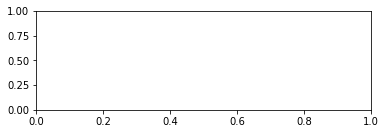

In [40]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder.to_csv('gapminder.csv')
gapminder_agg.to_csv('gapminder_agg.csv')
